In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

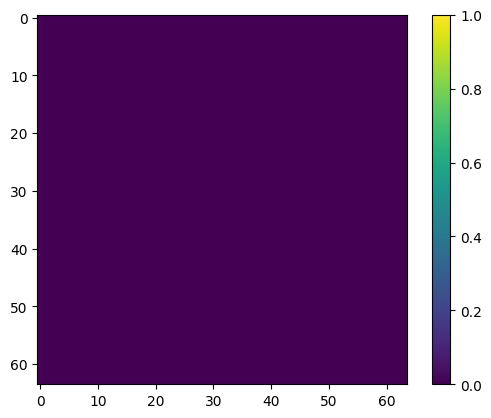

In [71]:
data = np.loadtxt("./output/bound-0.txt")
plt.imshow(data,vmin=0,vmax=1)
plt.colorbar()

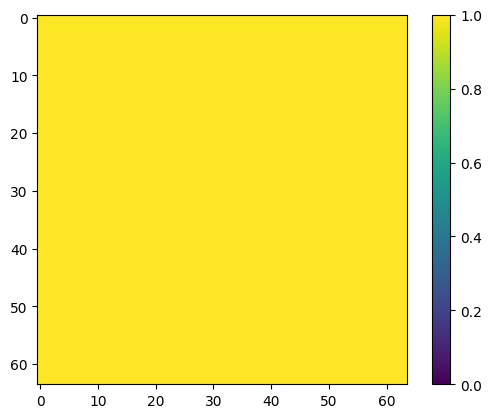

In [72]:
data = np.loadtxt("./output/rho-0.txt")
plt.imshow(data,vmin=0,vmax=1)
plt.colorbar()

# Final Output

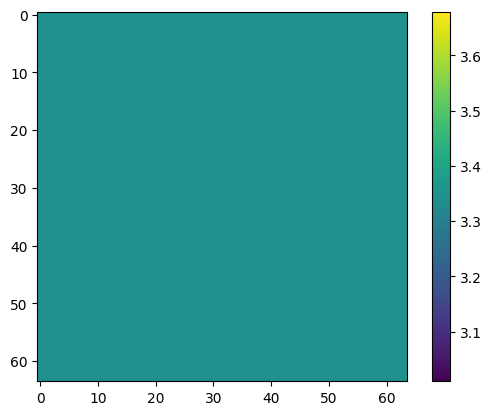

In [67]:
data = np.loadtxt("./output/p.txt")
plt.imshow(data)
plt.colorbar()

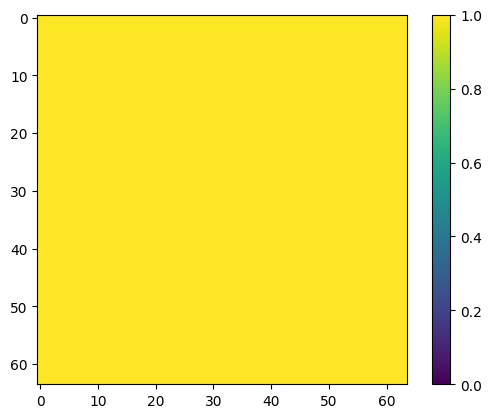

In [68]:
data = np.loadtxt("./output/rho.txt")
plt.imshow(data,vmin=0)
plt.colorbar()

# Output at given time

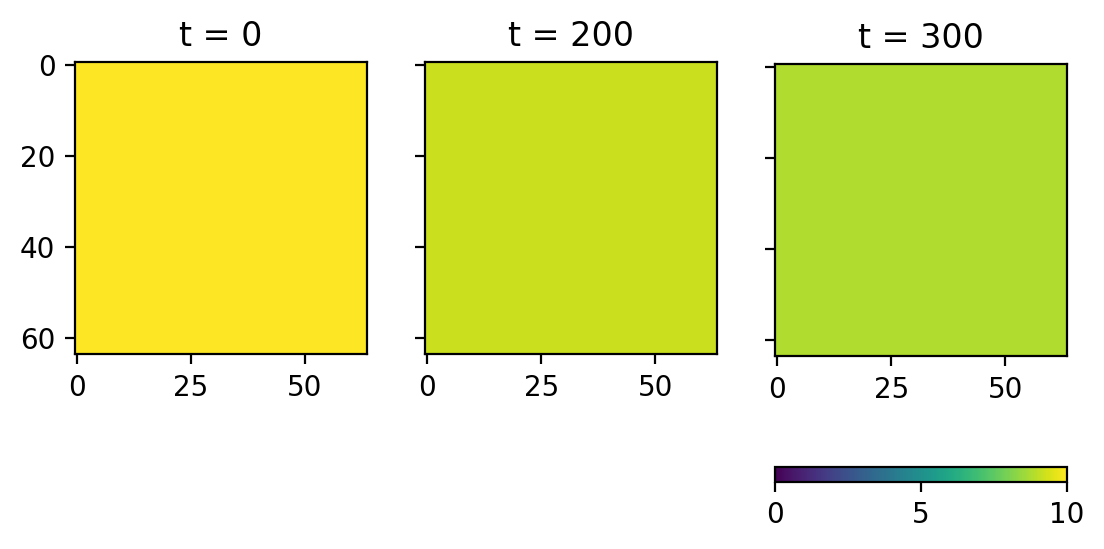

In [69]:
t = [0,200,300]
field = 'p'

fig, axs = plt.subplots(1,len(t),sharey=True,dpi=200)
for ii in range(len(t)):
    data = np.loadtxt('./output/' + field + '-' + str(t[ii]) + '.txt')
    im = axs[ii].imshow(data,vmin=0,vmax=10)
    axs[ii].set_title('t = ' + str(t[ii]))
plt.colorbar(im,orientation="horizontal")

# Pressure vs Time

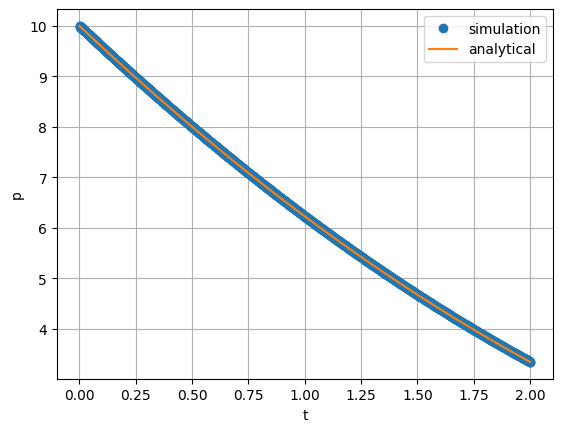

In [70]:
data = np.loadtxt("./output/p_vs_t.txt",delimiter=',')

plt.plot(data[:,0],data[:,1],'o',label='simulation')
plt.xlabel('t')
plt.ylabel('p')
plt.grid()

# Solve ODE

from scipy.integrate import solve_ivp

def dpdt(t,p):
    alpha = 2
    beta = 0.5
    A = -2
    gamma = 5/3
    rho = 1
    T = p / rho
    Q = A * rho**alpha * T**beta
    return (gamma-1) * Q

tmax = 2
teval = np.linspace(0,tmax,100)
sol = solve_ivp(dpdt,t_span=[0,tmax],y0=[10],t_eval=teval)

plt.plot(sol.t,sol.y[0],label='analytical')
plt.legend()
